## 프로젝트 1 : 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

In [1]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [3]:
dir(diabetes)

['DESCR',
 'data',
 'data_filename',
 'data_module',
 'feature_names',
 'frame',
 'target',
 'target_filename']

In [16]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [7]:
df_X = diabetes.data
df_y = diabetes.target
print(df_X.shape)
print(df_y.shape)
print(type(df_X.shape))
print(type(df_y.shape))

(442, 10)
(442,)
<class 'tuple'>
<class 'tuple'>


In [15]:
# data 확인
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [11]:
# (2) 모델에 입력할 데이터 X 준비하기
import numpy as np
X = np.array(df_X)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(442, 10)


In [12]:
# (3) 모델에 예측할 데이터 y 준비하기
y = np.array(df_y)
print(type(X))
print(y.shape)

<class 'numpy.ndarray'>
(442,)


In [13]:
# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [45]:
# (5) 모델 준비하기
W = np.random.rand(10)  # 10개의 특성에 대응하는 가중치 초기화
b = np.random.rand()    # 1개의 편향 초기화

print(W)
print(b)

# 모델 함수 구성 - 입력+가중치+편향 --> 예측치 산출
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions


[0.71636248 0.33640863 0.49817641 0.35580495 0.5807597  0.68996653
 0.53648726 0.92428746 0.73005775 0.70773423]
0.40298396093658695


In [18]:
# (6) 손실함수 loss 정의하기 (손실함수를 MSE 함수)
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L


In [20]:
# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    N = len(W)   # 가중치의 개수
    y_pred = model(X, W, b)   # 모델로부터 예측치 산출
    dW = 1/N * 2 * X.T.dot(y_pred - y)  
    # X(442,10)  y(442,) 내적을 위해 전치행렬 사용
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [22]:
dW, db = gradient(X, W, b,y)
print('dW:', dW)
print('db', db)

dW: [ -60.49393334  -13.72324596 -189.60563109 -142.55623363  -68.14850954
  -55.89639496  127.67729737 -138.96658325 -182.80347743 -123.40087249]
db -304.24150119675915


In [23]:
# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.0001

In [46]:
# (9) 모델 학습하기
losses = []
for i in range(1,50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i%5000 == 0:
        print("반복횟수 %d : Loss %0.2f" % (i, L))

반복횟수 5000 : Loss 8213.75
반복횟수 10000 : Loss 4878.74
반복횟수 15000 : Loss 4111.62
반복횟수 20000 : Loss 3803.52
반복횟수 25000 : Loss 3623.25
반복횟수 30000 : Loss 3500.33
반복횟수 35000 : Loss 3410.62
반복횟수 40000 : Loss 3342.34
반복횟수 45000 : Loss 3288.79
반복횟수 50000 : Loss 3245.85


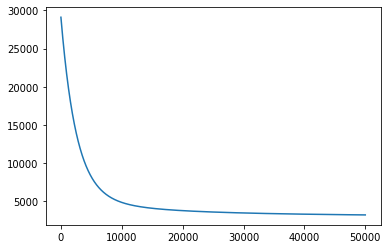

In [47]:
# (10) test 데이터에 대한 성능 확인하기
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

테스트 데이터 MSE:  2541.2984841978973


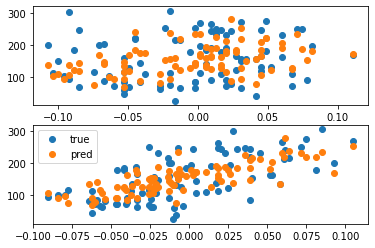

In [62]:
# (11) 정답 데이터와 예측한 데이터 시각화하기
prediction = model(X_test, W, b)  
mse = loss(X_test, W, b, y_test)  # 테스트 데이터 오차
print("테스트 데이터 MSE: ", mse)

fig =plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(X_test[:,0], y_test, label="true")
ax1.scatter(X_test[:,0], prediction, label="pred")

ax2.scatter(X_test[:,2], y_test, label="true")
ax2.scatter(X_test[:,2], prediction, label="pred")
plt.legend()
plt.show()

# 첫번째 컬럼인 '나이' 에 대해서는 뚜렷한 경향성이 없으나
# 세번째 컬럼인 '체지방지수' 에 대해서는 뚜렷한 경향성이 있어 설명력이 높음

## 프로젝트 2 : 날씨 좋은 월요일 오후 세 시, 자전거 타는 사람은 몇 명?

In [3]:
# (1) 데이터 가져오기
import pandas as pd
df_train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['min'] = df_train['datetime'].dt.minute
df_train['sec'] = df_train['datetime'].dt.second

df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  min         10886 non-

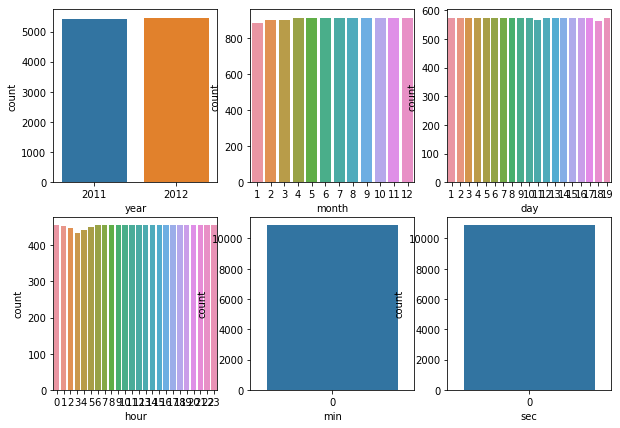

In [11]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(2,3,1)
sns.countplot(x="year", data=df_train)
ax2 = fig.add_subplot(2,3,2)
sns.countplot(x="month", data=df_train)
ax3 = fig.add_subplot(2,3,3)
sns.countplot(x="day", data=df_train)
ax4 = fig.add_subplot(2,3,4)
sns.countplot(x="hour", data=df_train)
ax5 = fig.add_subplot(2,3,5)
sns.countplot(x="min", data=df_train)
ax6 = fig.add_subplot(2,3,6)
sns.countplot(x="sec", data=df_train)

plt.show()


In [16]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929,6.521495,9.992559,11.541613,0.0,0.0
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019,3.444373,5.476608,6.915838,0.0,0.0
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000,4.000000,5.000000,6.000000,0.0,0.0
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000,7.000000,10.000000,12.000000,0.0,0.0
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000,10.000000,15.000000,18.000000,0.0,0.0
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000,12.000000,19.000000,23.000000,0.0,0.0


In [20]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리
sel_col = ['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'month', 'hour']
X = df_train[sel_col]
y = df_train['count']
print(X.head())

   season  holiday  workingday  weather  temp  humidity  windspeed  month  \
0       1        0           0        1  9.84        81        0.0      1   
1       1        0           0        1  9.02        80        0.0      1   
2       1        0           0        1  9.02        80        0.0      1   
3       1        0           0        1  9.84        75        0.0      1   
4       1        0           0        1  9.84        75        0.0      1   

   hour  
0     0  
1     1  
2     2  
3     3  
4     4  


In [21]:
print(X.shape)
print(y.shape)

(10886, 9)
(10886,)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 9) (8708,)
(2178, 9) (2178,)


In [23]:
# (5) LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
predictions = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = (mse)**(1/2)
print("MSE 손실함수 값: ", mse)
print("RMSE 손실함수 값: ", rmse)

MSE 손실함수 값:  20181.246180651615
RMSE 손실함수 값:  142.06071300909204


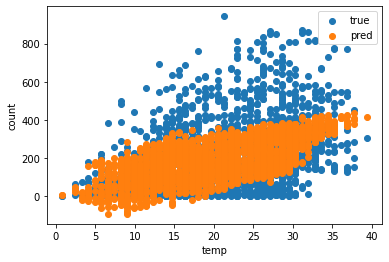

In [30]:
# (7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# Temp와의 관련성
plt.scatter(X_test['temp'], y_test, label="true")
plt.scatter(X_test['temp'], predictions, label="pred")
plt.xlabel('temp')
plt.ylabel('count')
plt.legend()
plt.show()

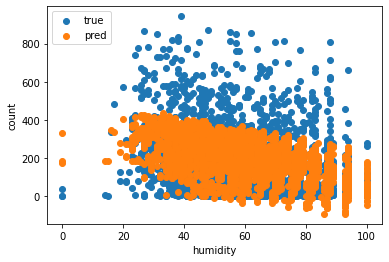

In [31]:
# Humidity와의 관련성

plt.scatter(X_test['humidity'], y_test, label="true")
plt.scatter(X_test['humidity'], predictions, label="pred")
plt.xlabel('humidity')
plt.ylabel('count')
plt.legend()
plt.show()

# 회고

 * Regression의 세부적인 내용을 프로세스 단위별로 따라해 볼 수 있어서 구체적인 학습방법의 과정을 이해 할 수 있었음
 * 데이터의 특성을 잘 파악하고, 이를 효과적으로 사용하기 위해 데이터 조작 및 시각화 에 숙달이 필요함을 느꼈음
 * 알고 있는 내용이더라도 코딩으로 구현할 때, 다양한 방법이 있을 수 있음을 알 수 있었음
 * 복잡한 구조의 학습과정도 기본적인 접근은 유사할 것으로 생각되어, 학습과정의 구조적인 관점을 알 수 있어서 의미 있었음